In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('city_temperature.csv')
globaldf = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')

# Drop rows with missing or invalid dates
df = df.dropna(subset=['Date'])
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-01-02
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-01-03
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-01-04
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-01-05
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8,2013-07-30


In [4]:
filtered_rows = df[df['AvgTemperature'] < -50.0]


In [5]:
grouped_df = df.groupby(['City', 'Year', 'Month']).median().reset_index()
grouped_df

,City,Year,Month,Day,AvgTemperature
0,Abidjan,1995,1,16.0,80.80
1,Abidjan,1995,2,14.5,82.65
2,Abidjan,1995,3,16.0,83.00
3,Abidjan,1995,4,15.5,83.85
4,Abidjan,1995,5,16.0,82.50
...,...,...,...,...,...
93760,Zurich,2020,1,16.0,37.30
93761,Zurich,2020,2,15.0,41.90
93762,Zurich,2020,3,16.0,40.50
93763,Zurich,2020,4,15.5,57.45


In [6]:
# tell_city=input()
# avgMonth = np.array(df[(df['Date'] <= '1995-01-31') & (df['Date'] >= '1995-01-01') & (df['City'] == tell_city)]['AvgTemperature'].tolist())
# np.median(avgMonth)


In [7]:
df = df[df['AvgTemperature'].apply(lambda x : x > -90 )]

enter cityDelhi
enter starting date2000-10-10
enter end data2010-10-10


<Figure size 1500x480 with 0 Axes>

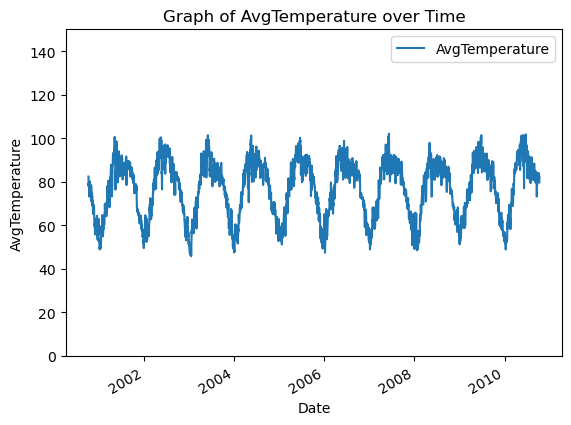

In [8]:
city = input("enter city")

x= input("enter starting date")
y=input("enter end data")

# Generate a date range
start_date = x
end_date = y
filtered_df = df[(df['City'] == city) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Set 'Date' as the index
# df.set_index('Date', inplace=True)

# Plot the graph
plt.figure().set_figwidth(15)
filtered_df.plot(x='Date',y='AvgTemperature')
plt.xlabel('Date')
plt.ylabel('AvgTemperature')
plt.title('Graph of AvgTemperature over Time')
plt.ylim([0, 150])
plt.show()

    
    
    
    
    
    
    


In [9]:
grouped_data = df.groupby(['Month', 'City','Year']).agg({'AvgTemperature': ['mean', 'median']})


grouped_data['Difference'] = abs(grouped_data[('AvgTemperature', 'mean')] - grouped_data[('AvgTemperature', 'median')])

x=int(input("enter the max differnce allowed: "))

filtered_data = grouped_data[grouped_data['Difference'] > x]

for index, row in filtered_data.iterrows():
    Month = index[0]
    City = index[1]
    Year = index[2]
    print(f"For month {Month} and year {Year}, city {City} has a mean-median difference greater than {x} degrees.")




enter the max differnce allowed: 10
For month 1 and year 2004, city Great Falls has a mean-median difference greater than 10 degrees.
For month 2 and year 1996, city Helena has a mean-median difference greater than 10 degrees.
For month 3 and year 2003, city Edmonton has a mean-median difference greater than 10 degrees.
For month 3 and year 2003, city Regina has a mean-median difference greater than 10 degrees.
For month 3 and year 2003, city Winnipeg has a mean-median difference greater than 10 degrees.
For month 12 and year 1996, city Great Falls has a mean-median difference greater than 10 degrees.


In [10]:
groupp = df.groupby('City').agg({'AvgTemperature': ['mean']})
filtered_group = groupp.mean
filtered_group
# max_values = groupp['AvgTemperature'].max()
# min_values = groupp['AvgTemperature'].min()



<bound method NDFrame._add_numeric_operations.<locals>.mean of              AvgTemperature
                       mean
City                       
Abidjan           80.246923
Abilene           64.731111
Abu Dhabi         82.859803
Addis Ababa       62.950385
Akron Canton      50.649789
...                     ...
Yerevan           55.517095
Youngstown        49.830317
Yuma              75.744678
Zagreb            54.412981
Zurich            49.668068

[321 rows x 1 columns]>

In [11]:
boundd = groupp.max()
boundd

AvgTemperature  mean    85.963894
dtype: float64

In [12]:

print("total no of Countries are "+str(df.City.nunique()))
print("total no of cities are "+str(df.Country.nunique()))






total no of Countries are 321
total no of cities are 125


In [13]:
df_grouped1 = df.groupby(['Country', 'City']).agg({'AvgTemperature':'max'})
print(df_grouped1)
df_grouped12 = df.groupby(['Country', 'City']).agg({'AvgTemperature':'min'})
print(df_grouped12)

                         AvgTemperature
Country    City                        
Albania    Tirana                  92.5
Algeria    Algiers                 96.6
Argentina  Buenos Aires            90.9
Australia  Brisbane                87.3
           Canberra                93.2
...                                 ...
Uzbekistan Tashkent                95.4
Venezuela  Caracas                 89.9
Vietnam    Hanoi                   96.0
Yugoslavia Belgrade                91.9
Zambia     Lusaka                  93.2

[321 rows x 1 columns]
                         AvgTemperature
Country    City                        
Albania    Tirana                  24.9
Algeria    Algiers                 33.3
Argentina  Buenos Aires            35.3
Australia  Brisbane                45.6
           Canberra                30.7
...                                 ...
Uzbekistan Tashkent                 3.8
Venezuela  Caracas                 71.5
Vietnam    Hanoi                   44.7
Yugoslavia Belgr

In [14]:
grouped_data

AvgTemperature        Difference
                             mean median           
Month City    Year                                 
1     Abidjan 1995      79.916129   80.8   0.883871
              1996      80.754839   80.4   0.354839
              1997      80.483871   80.7   0.216129
              1998      81.145161   81.0   0.145161
              1999      81.286667   81.4   0.113333
...                           ...    ...        ...
12    Zurich  2015      40.020000   40.0   0.020000
              2016      33.254839   32.5   0.754839
              2017      34.364516   33.4   0.964516
              2018      38.219355   38.3   0.080645
              2019      38.848387   40.4   1.551613

[92913 rows x 3 columns]

This will tell you the complete plot of the avgtemperature of the city
enter city 
Delhi


<Figure size 300000x300000 with 0 Axes>

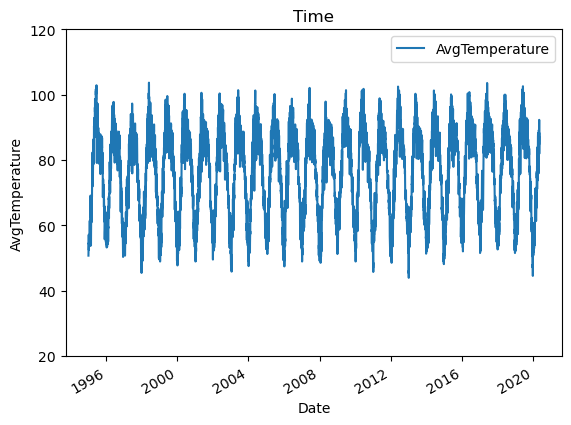

In [15]:
print("This will tell you the complete plot of the avgtemperature of the city")
city = input("enter city \n")
filtered_df = df[(df['City'] == city)]
# plt.figure().set_figwidth(15)
plt.figure(figsize=(3000, 3000)) 
filtered_df.plot(x='Date',y='AvgTemperature')
plt.xlabel('Date')
plt.ylabel('AvgTemperature')
plt.title('Time')
plt.ylim([20, 120])
plt.show()

    
    
    
    
    
    
    


In [16]:
globaldf

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [17]:
import copy

In [18]:
# dfSmallChunk = copy.copy(df[:1000])

In [19]:
# dfSmallChunk

In [20]:
# df3 = pd.merge(dfSmallChunk,globaldf,on="City",how = "left",indicator=True)

In [21]:
# df3

In [22]:
# dfSmallChunk.join(globaldf, on="City",how = "left",lsuffix = 'L')

In [23]:
df2=globaldf.groupby('City').first().reset_index()

In [24]:
df2

,City,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude
0,A Coruña,1743-11-01,10.779,1.942,Spain,42.59N,8.73W
1,Aachen,1743-11-01,6.425,1.628,Germany,50.63N,6.34E
2,Aalborg,1743-11-01,6.068,1.737,Denmark,57.05N,10.33E
3,Aba,1856-01-01,26.366,1.287,Nigeria,5.63N,8.07E
4,Abadan,1820-08-01,32.877,1.752,Iran,29.74N,48.00E
...,...,...,...,...,...,...,...
3443,Århus,1743-11-01,6.068,1.737,Denmark,57.05N,10.33E
3444,Çorlu,1743-11-01,10.013,2.291,Turkey,40.99N,27.69E
3445,Çorum,1753-01-01,-1.548,4.951,Turkey,40.99N,34.08E
3446,Öskemen,1820-08-01,14.284,2.544,Kazakhstan,50.63N,82.39E


In [25]:
df3 = pd.merge(df,df2,on="City",how = "left",indicator=True)

In [26]:
df3=df3.drop(['AverageTemperature','dt','AverageTemperatureUncertainty','Country_y','_merge'], axis=1)

In [27]:
globaldf.loc[globaldf['City'] == 'San Juan Puerto Rico']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


In [28]:
df3

,Region,Country_x,State,City,Month,Day,Year,AvgTemperature,Date,Latitude,Longitude
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-01-01,36.17N,3.98E
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-01-02,36.17N,3.98E
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-01-03,36.17N,3.98E
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-01-04,36.17N,3.98E
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-01-05,36.17N,3.98E
...,...,...,...,...,...,...,...,...,...,...,...
2826650,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4,2013-07-27,NaN,NaN
2826651,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6,2013-07-28,NaN,NaN
2826652,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2,2013-07-29,NaN,NaN
2826653,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8,2013-07-30,NaN,NaN


In [29]:
df3['Latitude'].isna().sum()

807986

In [30]:
countries = np.unique(df['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(df[df['Country'] == country]['AvgTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [31]:
countries = np.unique(df['City'])
mean_temp = []
for country in countries:
    mean_temp.append(df[df['City'] == country]['AvgTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')